In [2]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


####Multiple Linear Regression


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


df = pd.read_csv("diabetes.csv")

X = df[['Glucose', 'BMI', 'Age']].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
ones = np.ones((X_train.shape[0], 1))
X_train_b = np.hstack((ones, X_train))

beta = np.linalg.inv(X_train_b.T @ X_train_b) @ X_train_b.T @ y_train

intercept_manual = beta[0]
coefficients_manual = beta[1:]

ones_test = np.ones((X_test.shape[0], 1))
X_test_b = np.hstack((ones_test, X_test))

y_pred_manual = X_test_b @ beta

mse_manual = np.mean((y_test - y_pred_manual)**2)
rmse_manual = np.sqrt(mse_manual)

ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred_manual)**2)
r2_manual = 1 - (ss_residual / ss_total)

print("Intercept:", intercept_manual)
print("Coefficients:", coefficients_manual)
print("MSE:", mse_manual)
print("RMSE:", rmse_manual)
print("R2:", r2_manual)

Intercept: -1.0034485446428683
Coefficients: [0.00534109 0.01426751 0.00755256]
MSE: 0.18578147442861845
RMSE: 0.43102375158292433
R2: 0.1908184669331282


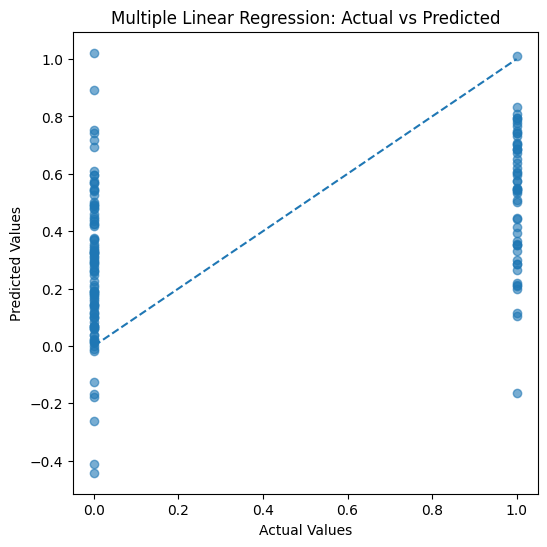

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle='--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.show()

##Polynomial Linear Regression

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("diabetes.csv")

X = df[['Glucose']].values
y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train_poly = np.hstack((np.ones((X_train.shape[0], 1)),
                          X_train,
                          X_train**2))

X_test_poly = np.hstack((np.ones((X_test.shape[0], 1)),
                         X_test,
                         X_test**2))

beta = np.linalg.inv(X_train_poly.T @ X_train_poly) @ X_train_poly.T @ y_train

y_pred = X_test_poly @ beta

mse = np.mean((y_test - y_pred)**2)
rmse = np.sqrt(mse)

ss_total = np.sum((y_test - np.mean(y_test))**2)
ss_residual = np.sum((y_test - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)

print("Intercept:", beta[0])
print("Coefficients:", beta[1:])
print("Polynomial MSE:", mse)
print("Polynomial RMSE:", rmse)
print("Polynomial R2:", r2)

Intercept: 0.10570125136244943
Coefficients: [-3.34063136e-03  4.12613659e-05]
Polynomial MSE: 0.17239231359433202
Polynomial RMSE: 0.4152015337090315
Polynomial R2: 0.2491357007891314


Plotting of Polynomial regression


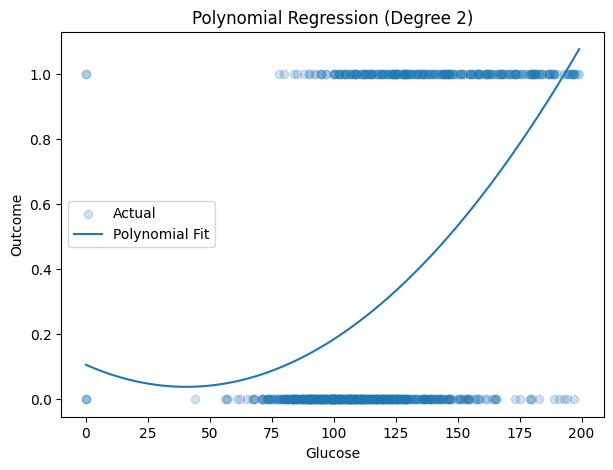

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)

X_range_poly = np.hstack((
    np.ones((X_range.shape[0], 1)),
    X_range,
    X_range**2
))

y_range_pred = X_range_poly @ beta

plt.figure(figsize=(7,5))
plt.scatter(X, y, alpha=0.2, label="Actual")
plt.plot(X_range, y_range_pred, label="Polynomial Fit")
plt.xlabel("Glucose")
plt.ylabel("Outcome")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.show()

comparison of Linear and Polynomial Regression

In [22]:
print(f"Linear RMSE: {rmse_ml:.4f}")
print(f"Polynomial RMSE: {rmse:.4f}")

print(f"Linear R2: {r2_ml:.4f}")
print(f"Polynomial R2: {r2:.4f}")

Linear RMSE: 0.4310
Polynomial RMSE: 0.4152
Linear R2: 0.1908
Polynomial R2: 0.2491
